EDA is the step where we get to understand our data. And also this would be the perfect time to answer some of the questions we had about our data. while I was doing data wrangling i noticed that there was 5 rows for each of the dates and that made us question wether the data in recorded once a day and the dates are just not accurate or are the 5 rows with the same date actually just a reading of weather throughout that same day. We can test this here using hypothesis testing!

In [1]:
#lets start by importing necessary packages!
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #for our hypothesis test

In [2]:
#we found another data set that has the min and max of temp through a year in new york. which we can use to compare
#with the data set we have. lets upload our data!

data_b = pd.read_csv("C:/Users/moe/Downloads/sample data/NYC_weather_1869-2022.csv")

In [3]:
data_b.head()

DATE  PRCP  SNOW  SNWD  TMIN  TMAX
0  1869-01-01  0.75   9.0   NaN  19.0  29.0
1  1869-01-02  0.03   0.0   NaN  21.0  27.0
2  1869-01-03  0.00   0.0   NaN  27.0  35.0
3  1869-01-04  0.18   0.0   NaN  34.0  37.0
4  1869-01-05  0.05   0.0   NaN  37.0  43.0

In [4]:
#keeping only the cols we want
data_b = data_b[["DATE", "TMIN", "TMAX"]].copy()

In [5]:
#turning date col to datetime type
data_b['DATE'] = pd.to_datetime(data_b['DATE'])

In [6]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56245 entries, 0 to 56244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    56245 non-null  datetime64[ns]
 1   TMIN    56238 non-null  float64       
 2   TMAX    56238 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 MB


In [7]:
data_b.describe()

DATE          TMIN          TMAX
count                56245  56238.000000  56238.000000
mean   1945-12-31 00:00:00     46.774032     61.497617
min    1869-01-01 00:00:00    -15.000000      2.000000
25%    1907-07-03 00:00:00     34.000000     46.000000
50%    1945-12-31 00:00:00     47.000000     62.000000
75%    1984-06-30 00:00:00     62.000000     78.000000
max    2022-12-29 00:00:00     87.000000    106.000000
std                    NaN     17.000965     18.728157

In [8]:
#keeping only one year of our data which is the year of 2022
data_b = data_b[data_b["DATE"] >= "2022-01-01"].copy()

In [9]:
data_b.describe()

DATE        TMIN        TMAX
count                  363  363.000000  363.000000
mean   2022-07-01 00:00:00   49.096419   63.774105
min    2022-01-01 00:00:00    7.000000   15.000000
25%    2022-04-01 12:00:00   36.000000   49.000000
50%    2022-07-01 00:00:00   50.000000   66.000000
75%    2022-09-29 12:00:00   64.000000   79.000000
max    2022-12-29 00:00:00   79.000000   97.000000
std                    NaN   17.371281   18.365043

In [10]:
#checking if we have the days we would expect in a year long
data_b.shape

(363, 3)

In [11]:
#this looks good since we can see we're missing 2 days which is 30th and 31st of dec

In [12]:
#lets see if we have unique months
data_b['DATE'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
#yup this is how many months are in a year looks good so far!

#lets see if we have any duplicates or NAs
data_b.isna().sum()

DATE    0
TMIN    0
TMAX    0
dtype: int64

In [14]:
#looks good no NAs what about duplicates
data_b.duplicated().sum()

0

In [15]:
#great 0 duplicates! 

#lets upload our saved data set from our wrangling earlier.
%store -r summary_stats_by_date

summary_stats_by_date.head()

Date Temperature                                              \
                   count       mean        std        min        25%   
0 2024-01-01       100.0  64.888432  21.016609  30.004853  45.659901   
1 2024-01-02       100.0  64.496711  19.370107  31.433457  48.279891   
2 2024-01-03       100.0  62.856064  19.212318  30.364878  46.760827   
3 2024-01-04       100.0  64.642161  19.732846  30.473326  48.852566   
4 2024-01-05       100.0  68.293850  19.093052  31.798542  55.321731   

                                   Humidity  ...     Pressure               \
         50%        75%        max    count  ...          75%          max   
0  62.779760  86.822771  99.417991    100.0  ...  1026.575299  1038.707275   
1  68.267058  79.158908  99.927811    100.0  ...  1026.772731  1038.964160   
2  61.534740  78.558443  99.430378    100.0  ...  1020.798720  1039.962493   
3  65.783911  79.684475  99.454367    100.0  ...  1017.339562  1039.260615   
4  71.115211  82.829151  99.031929    100.0  ...  1022.138095  1038.594594   

  Rain Tomorrow                                           
          count  mean       std  min  25%  50%  75%  max  
0         100.0  0.14  0.348735  0.0  0.0  0.0  0.0  1.0  
1         100.0  0.22  0.416333  0.0  0.0  0.0  0.0  1.0  
2         100.0  0.19  0.394277  0.0  0.0  0.0  0.0  1.0  
3         100.0  0.23  0.422953  0.0  0.0  0.0  0.0  1.0  
4         100.0  0.18  0.386123  0.0  0.0  0.0  0.0  1.0  

[5 rows x 57 columns]

In [16]:
#looking at the data of interest up close
summary_stats_by_date[["Temperature", "Date"]].head()

Temperature                                                         \
        count       mean        std        min        25%        50%   
0       100.0  64.888432  21.016609  30.004853  45.659901  62.779760   
1       100.0  64.496711  19.370107  31.433457  48.279891  68.267058   
2       100.0  62.856064  19.212318  30.364878  46.760827  61.534740   
3       100.0  64.642161  19.732846  30.473326  48.852566  65.783911   
4       100.0  68.293850  19.093052  31.798542  55.321731  71.115211   

                              Date  
         75%        max             
0  86.822771  99.417991 2024-01-01  
1  79.158908  99.927811 2024-01-02  
2  78.558443  99.430378 2024-01-03  
3  79.684475  99.454367 2024-01-04  
4  82.829151  99.031929 2024-01-05

In [17]:
print(summary_stats_by_date.columns)

MultiIndex([(         'Date',      ''),
            (  'Temperature', 'count'),
            (  'Temperature',  'mean'),
            (  'Temperature',   'std'),
            (  'Temperature',   'min'),
            (  'Temperature',   '25%'),
            (  'Temperature',   '50%'),
            (  'Temperature',   '75%'),
            (  'Temperature',   'max'),
            (     'Humidity', 'count'),
            (     'Humidity',  'mean'),
            (     'Humidity',   'std'),
            (     'Humidity',   'min'),
            (     'Humidity',   '25%'),
            (     'Humidity',   '50%'),
            (     'Humidity',   '75%'),
            (     'Humidity',   'max'),
            (   'Wind Speed', 'count'),
            (   'Wind Speed',  'mean'),
            (   'Wind Speed',   'std'),
            (   'Wind Speed',   'min'),
            (   'Wind Speed',   '25%'),
            (   'Wind Speed',   '50%'),
            (   'Wind Speed',   '75%'),
            (   'Wind Speed',   'max'),


In [18]:
#lets filter and keep only the cols we're interested in

#only the data for the year 2024
filtered_df = summary_stats_by_date[(summary_stats_by_date[('Date', '')].dt.year == 2024)]

#this is the cols we want which includes the min and max
data_a = filtered_df[[('Date', ''), ('Temperature', 'min'), ('Temperature', 'max')]].copy()

#rename the cols
data_a.columns = ['DATE', 'TMIN', 'TMAX']

data_a.head()

DATE       TMIN       TMAX
0 2024-01-01  30.004853  99.417991
1 2024-01-02  31.433457  99.927811
2 2024-01-03  30.364878  99.430378
3 2024-01-04  30.473326  99.454367
4 2024-01-05  31.798542  99.031929

In [19]:
#lets reset the index just incase.
data_a.reset_index(drop=True, inplace=True)

data_a.head()

DATE       TMIN       TMAX
0 2024-01-01  30.004853  99.417991
1 2024-01-02  31.433457  99.927811
2 2024-01-03  30.364878  99.430378
3 2024-01-04  30.473326  99.454367
4 2024-01-05  31.798542  99.031929

In [20]:
#looks much better! now lets the min and max of both our data sets to see in what units the temp is to make 
#sure theyre the same 
min_A = min(data_a["TMIN"])
max_A = max(data_a["TMAX"])

min_B = min(data_b["TMIN"])
max_B = max(data_b["TMAX"])

print("min A is:", min_A, 
      "max A is:", max_A, 
      "min B is:", min_B, 
      "max B is:", max_B)

min A is: 30.000765979038025 max A is: 99.99739291850362 min B is: 7.0 max B is: 97.0


In [21]:
#both data sets are in Fahrenheit and we checked from where we got the data just in case.

#we can also see that for data A which is our original data set that we are building the model on
#the weather range for the whole year is quite off compared to the recorded data we know is accurate
#which means that our data might be just hypothetical data for projects and not an actual recording of weather 
#throughout the year which would make sense since our data included the year 2025 and we are yet to be time travelers
#but for the sake of EDA we will still go with it and do hypothesis testing!

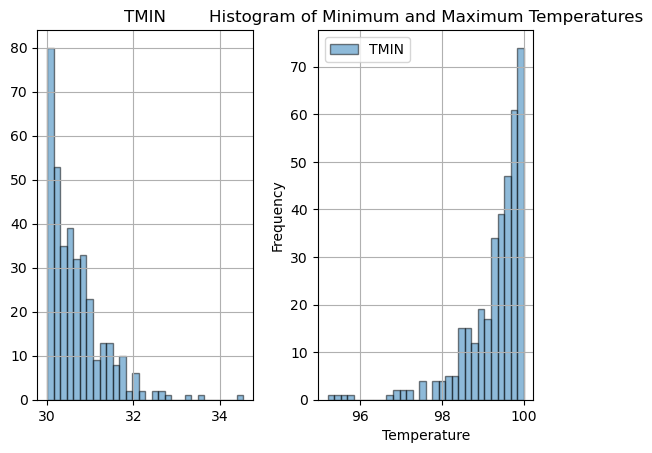

In [22]:
#lets view a hist of both
data_a[['TMIN', 'TMAX']].hist(bins=30, alpha=0.5, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum and Maximum Temperatures')
plt.legend(['TMIN', 'TMAX'])
plt.show()

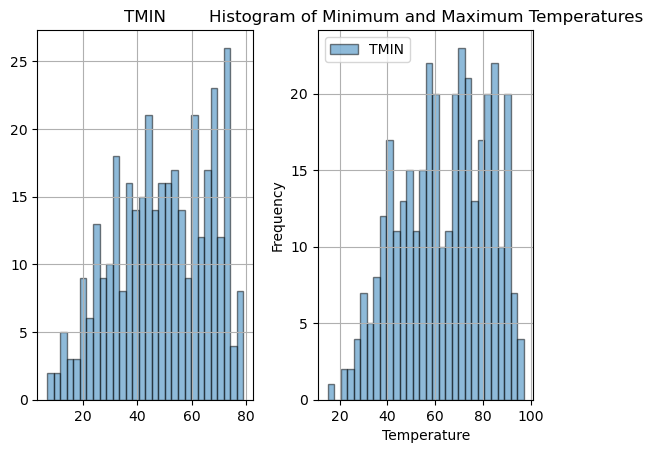

In [23]:
#data_b
data_b[['TMIN', 'TMAX']].hist(bins=30, alpha=0.5, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum and Maximum Temperatures')
plt.legend(['TMIN', 'TMAX'])
plt.show()

In [24]:
#interesting we can see that one of data B has a much wider range of weather temps
#but we're not inerested in knowing if the data captures the seasonal year we're more interested to find out if 
#in our original data the 5 different rows for each date were they recorded in the same day or are they different days
#and for that we're more interested in the ranges between temps in the same day! lets create those cols of ranges
data_a["RNG"] = data_a["TMAX"] - data_a["TMIN"]
data_b["RNG"] = data_b["TMAX"] - data_b["TMIN"]

In [25]:
data_a.head()

DATE       TMIN       TMAX        RNG
0 2024-01-01  30.004853  99.417991  69.413138
1 2024-01-02  31.433457  99.927811  68.494354
2 2024-01-03  30.364878  99.430378  69.065500
3 2024-01-04  30.473326  99.454367  68.981040
4 2024-01-05  31.798542  99.031929  67.233387

In [26]:
data_b.head()

DATE  TMIN  TMAX   RNG
55882 2022-01-01  50.0  56.0   6.0
55883 2022-01-02  37.0  59.0  22.0
55884 2022-01-03  22.0  37.0  15.0
55885 2022-01-04  19.0  34.0  15.0
55886 2022-01-05  31.0  47.0  16.0

In [27]:
#so we can already see quite a big difference! lets look at the difference between our 2 data sets ranges
observed_diff = data_a['RNG'].mean() - data_b['RNG'].mean()
print("The observed difference is:", observed_diff)

The observed difference is: 53.94999909504838


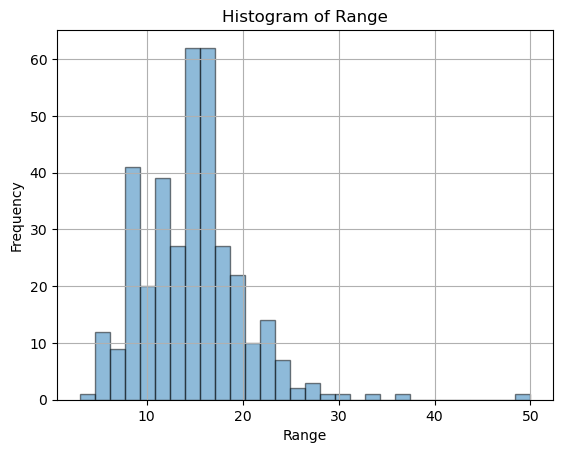

In [33]:
data_b["RNG"].hist(bins=30, alpha=0.5, edgecolor='black')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Histogram of Range')
plt.show()

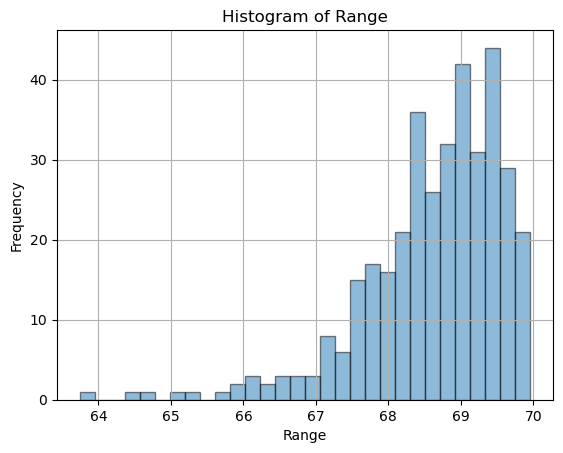

In [34]:
data_a["RNG"].hist(bins=30, alpha=0.5, edgecolor='black')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Histogram of Range')
plt.show()

In [28]:
#the observed difference is quite large for weather data! we can already see that they differ quite a lot
#but lets see this with hypothesis testing!

#for the hypothesis testing we will be doing a permutation test! a none parametric test feels right here


#Null Hypothesis (H₀):

#The temperature ranges recorded in the two datasets are not significantly different 
#and any observed differences can be attributed to random chance.


#Alternative Hypothesis (H₁):

#The observed difference in temperature ranges is significant and indicates that the datasets are, in fact, different.


#Significance level (ALPHA): 0.05

In [29]:
#lets start our test!

#combining our data
combined_ranges = np.concatenate([data_a['RNG'].values, data_b['RNG'].values])

#number of shuffling and sampling we want to make
n_permutations = 10000
permutation_diffs = []

#iterate over the number of set tests to shuffle the data each time split it calculate ranges and taking their mean RNG
for _ in range(n_permutations):
    np.random.shuffle(combined_ranges)
    
    perm_a = combined_ranges[:len(data_a)]
    perm_b = combined_ranges[len(data_a):]
    perm_diff = perm_a.mean() - perm_b.mean()
    permutation_diffs.append(perm_diff)

#calculating the p-value to see how unlikely our observed difference is under the null hypothesis
p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))

#result
print(f"Observed Difference: {observed_diff}")
print(f"P-Value: {p_value}")

Observed Difference: 53.94999909504838
P-Value: 0.0


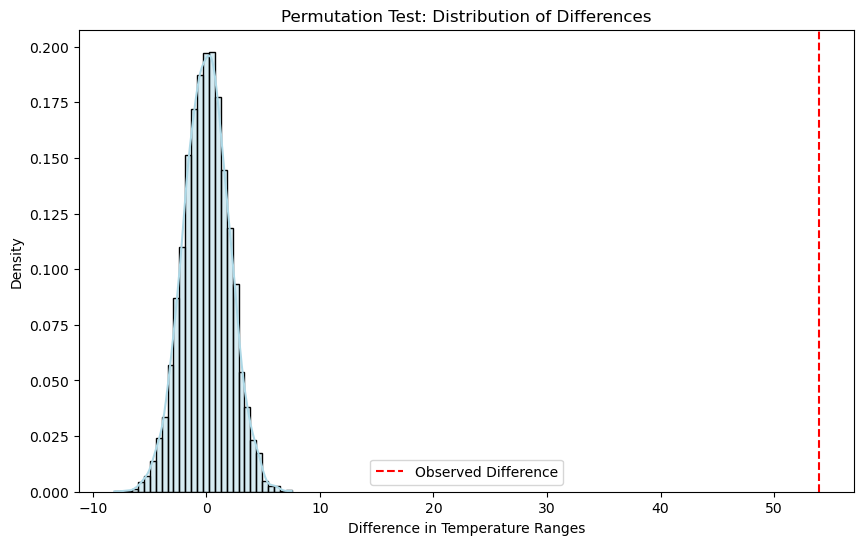

In [30]:
#we can already see that the p value is 0.0! just for our curiosity lets visualize this
plt.figure(figsize=(10, 6))

sns.histplot(permutation_diffs, bins=30, kde=True, color='lightblue', stat='density')

plt.axvline(observed_diff, color='red', linestyle='--', label='Observed Difference')

plt.title('Permutation Test: Distribution of Differences')
plt.xlabel('Difference in Temperature Ranges')
plt.ylabel('Density')
plt.legend()

plt.show()

In [31]:
#such a huge difference!

#We obtained a p-value of 0.0, which indicates that the observed difference in temperature ranges is highly unlikely
#to occur by random chance under the null hypothesis. Therefore, we reject the null hypothesis and conclude that there
#is a significant difference in the temperature ranges between the two datasets.

#due to these results moving forward we know to treat each row as its own observation and not treat the repeated dates
#as a single observation! mystery solved woohoo!

In [32]:
#now lets bring back our cleaned df to do EDA on!
df = pd.read_csv("C:/Users/moe/Desktop/result of data wrangling/cleaned_df.csv")
df.head()

Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
0  2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
1  2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
2  2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
3  2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
4  2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   

   Cloud Cover     Pressure  Rain Tomorrow  
0    69.617966  1026.030278              0  
1    41.606048   995.962065              0  
2    77.364763   980.796739              1  
3    52.541196   979.012163              0  
4    85.584000  1031.790859              0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [ ]:
#we can see that we might have missed the date col which should be a datetime type but we will leave it for now
#since we dont want to visualize it right now and that could make our work easier.

In [36]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation   Cloud Cover  \
count  73100.000000  73100.000000  73100.000000   73100.000000  73100.000000   
mean      65.182270     59.875041     15.017946       0.390635     54.942807   
std       20.205793     23.066115      8.668729       0.474833     25.982487   
min       30.000766     20.000272      0.000712       0.000000     10.000856   
25%       47.678968     39.800732      7.485182       0.000000     32.318668   
50%       65.294949     59.887840     15.102495       0.196909     55.011121   
75%       82.636570     79.835990     22.551794       0.673177     77.412469   
max       99.997393     99.999025     29.999017       3.078090     99.998957   

           Pressure  Rain Tomorrow  
count  73100.000000   73100.000000  
mean    1005.176013       0.220410  
std       20.203889       0.414526  
min      970.000919       0.000000  
25%      987.697646       0.000000  
50%     1005.284188       0.000000  
75%     1022.727410       0.000000  
max     1039.999765       1.000000

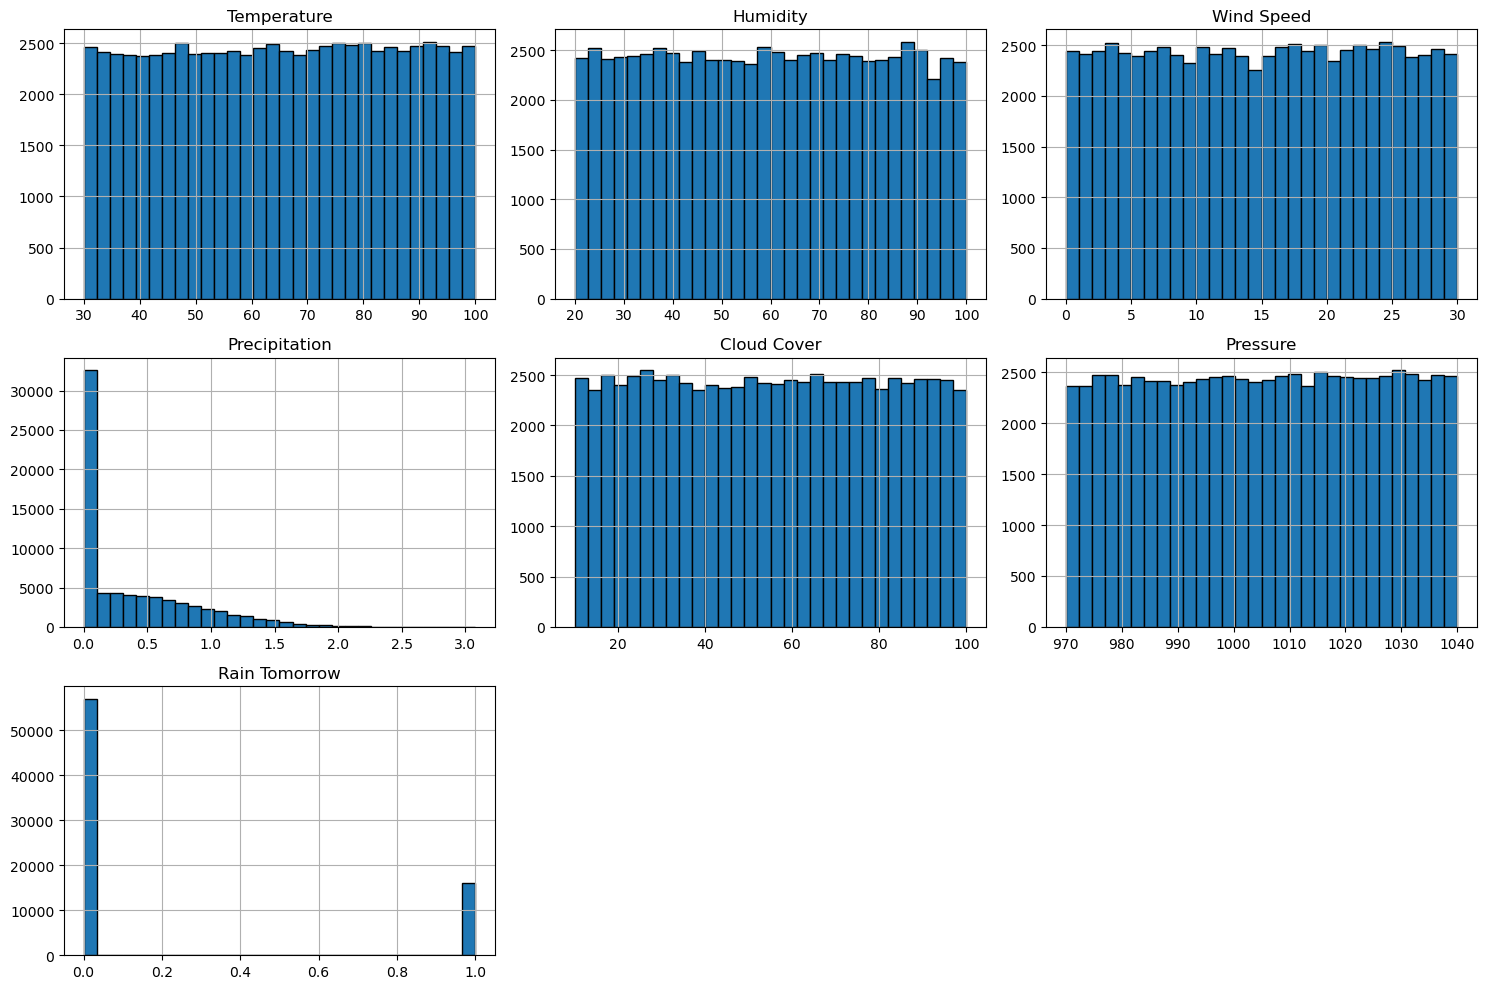

In [37]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')

plt.tight_layout()
plt.show()

In [ ]:
#interesting quite abit of uniform distribution. our vector also has far more no rain prediction which is something
#to be aware of. precipitation is heavily right skewed. which is worth noting and being aware of when picking our model

C:\Users\moe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


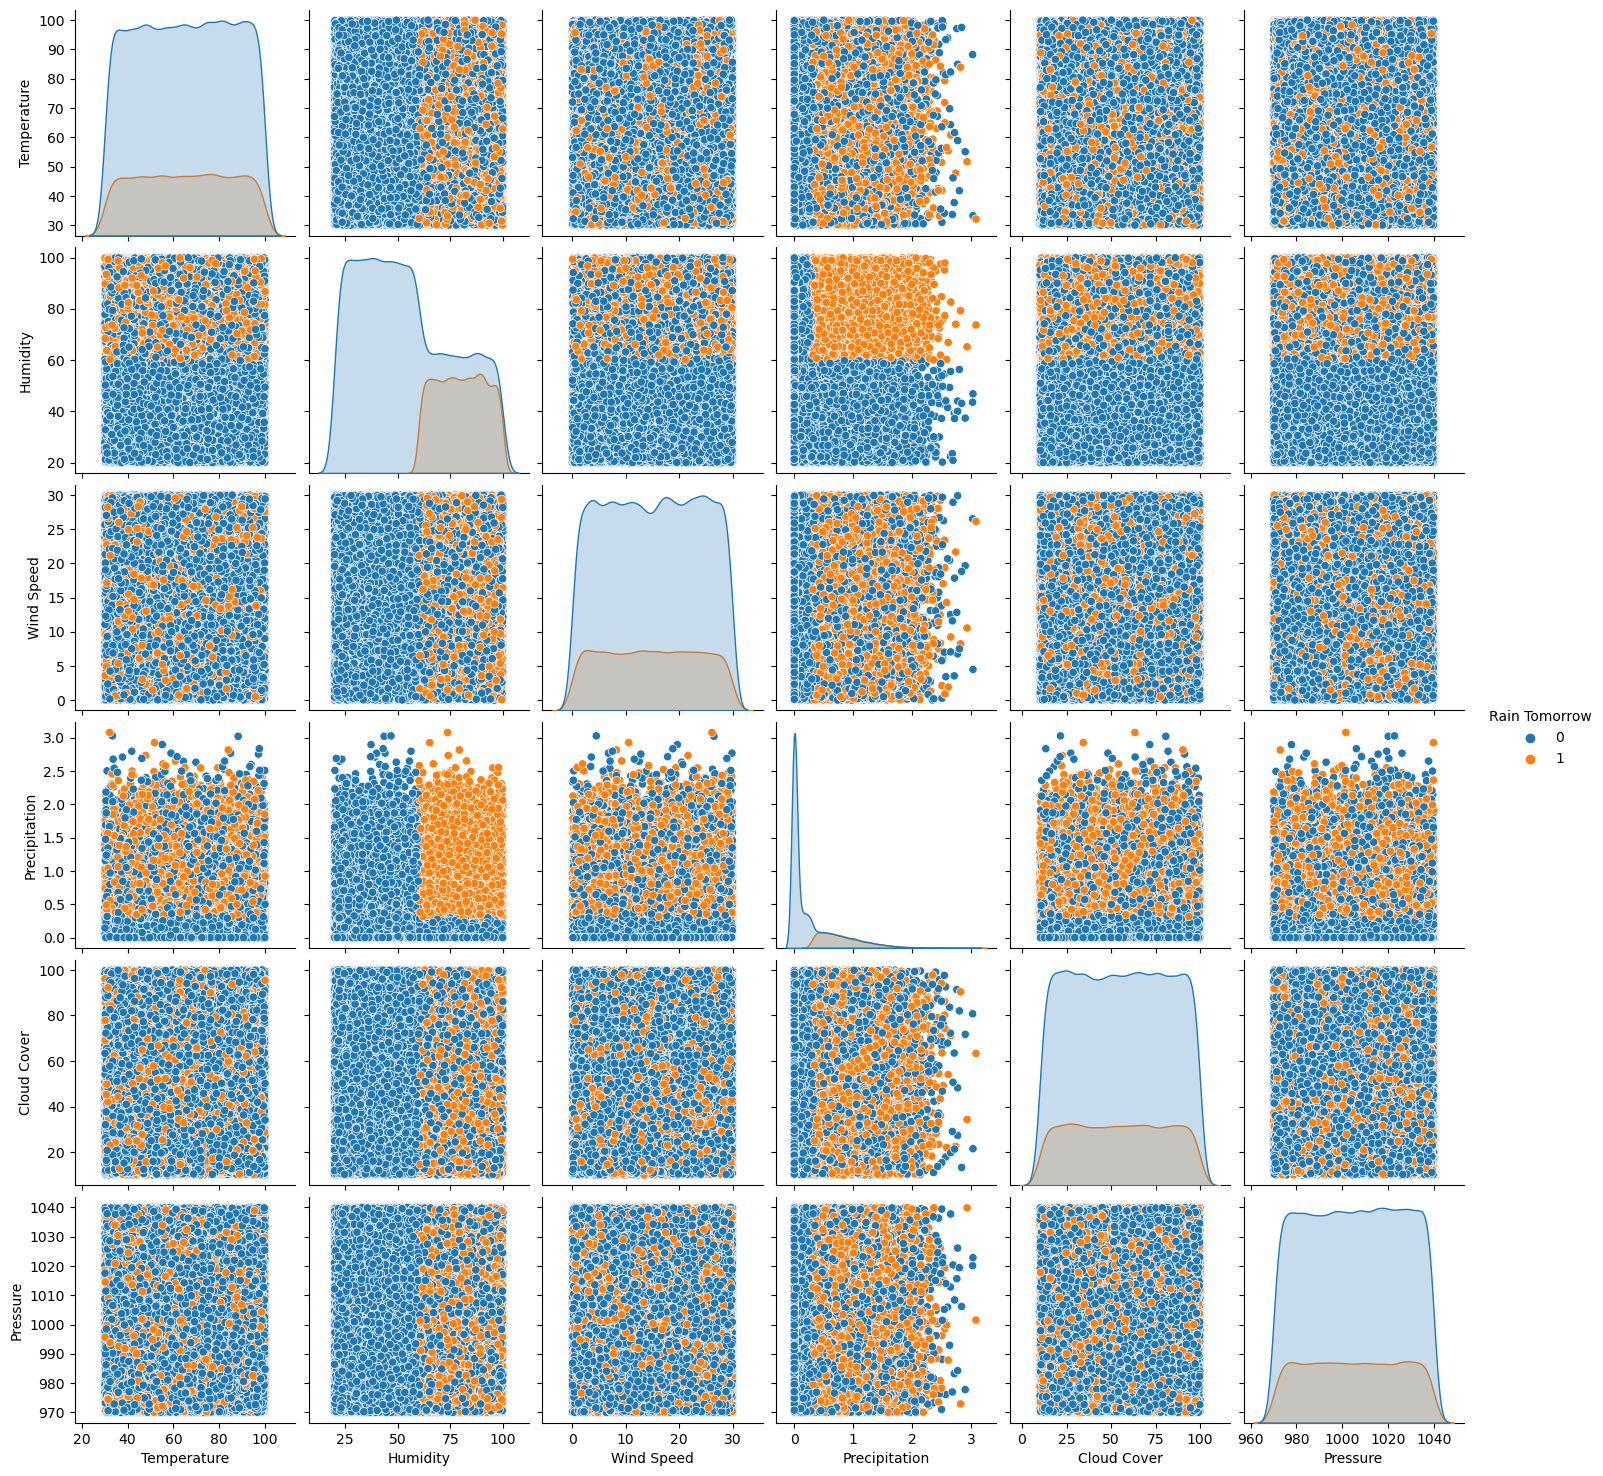

In [40]:
#lets make a pairplot
sns.pairplot(df, hue='Rain Tomorrow')
plt.show()

In [ ]:
#right here we can see some trends for example high humidity already looks like a great identifier since it seperates
#our points pretty clearly across all predictors but if we look at humidity with precipitation those two together
#look like very good identifiers! looks like after a certain level of both rain occurs. 

#when we look at precipitation rain tends to never occur if levels are too low close to 0.

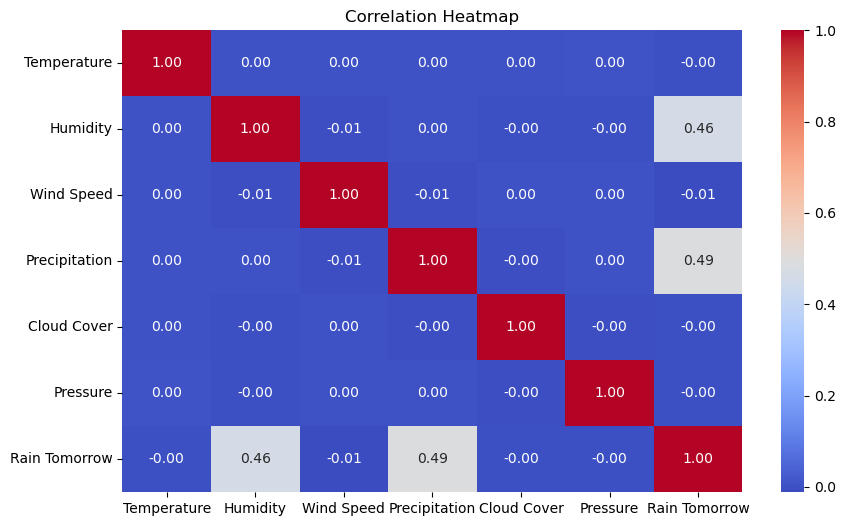

In [42]:
#lets look at a heatmap and see if that provides us with more information
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#we can see some moderate positive relationships but im already feeling like a non linear model would 
#do better on this data set 

In [45]:
#lets give our dates a chance to prove themselves and see how the weather differs within different times of year
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
df.info() #making sure its a datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           73100 non-null  datetime64[ns]
 1   Location       73100 non-null  object        
 2   Temperature    73100 non-null  float64       
 3   Humidity       73100 non-null  float64       
 4   Wind Speed     73100 non-null  float64       
 5   Precipitation  73100 non-null  float64       
 6   Cloud Cover    73100 non-null  float64       
 7   Pressure       73100 non-null  float64       
 8   Rain Tomorrow  73100 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 5.0+ MB


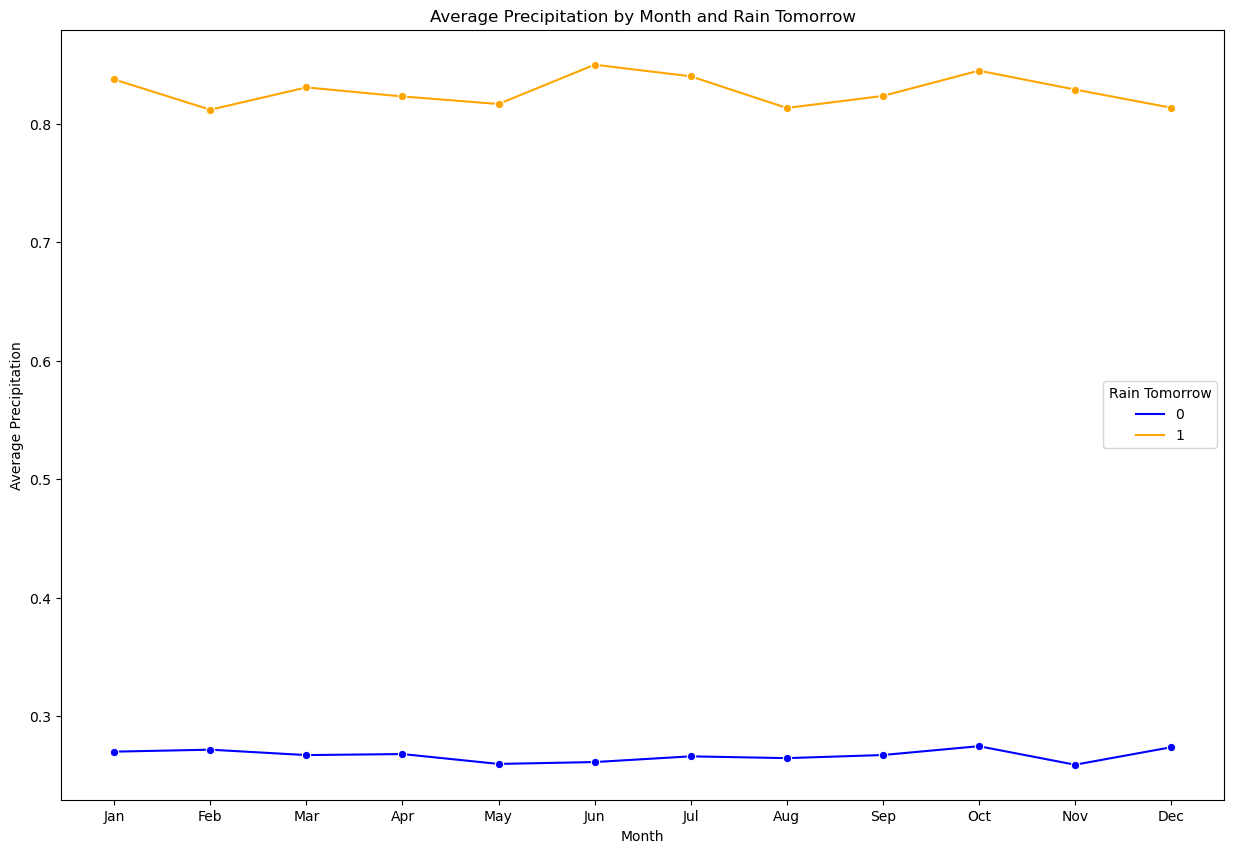

In [52]:
#moment of truth

monthly_precipitation = df.groupby([df['Date'].dt.month, 'Rain Tomorrow'])['Precipitation'].mean().reset_index()

plt.figure(figsize=(15, 10))


sns.lineplot(data=monthly_precipitation, x='Date', y='Precipitation', hue='Rain Tomorrow', palette=['blue', 'orange'], marker='o')

plt.title('Average Precipitation by Month and Rain Tomorrow')
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 
                                         'Nov', 'Dec'])
plt.legend(title='Rain Tomorrow')
plt.show()

In [ ]:
#sigh...

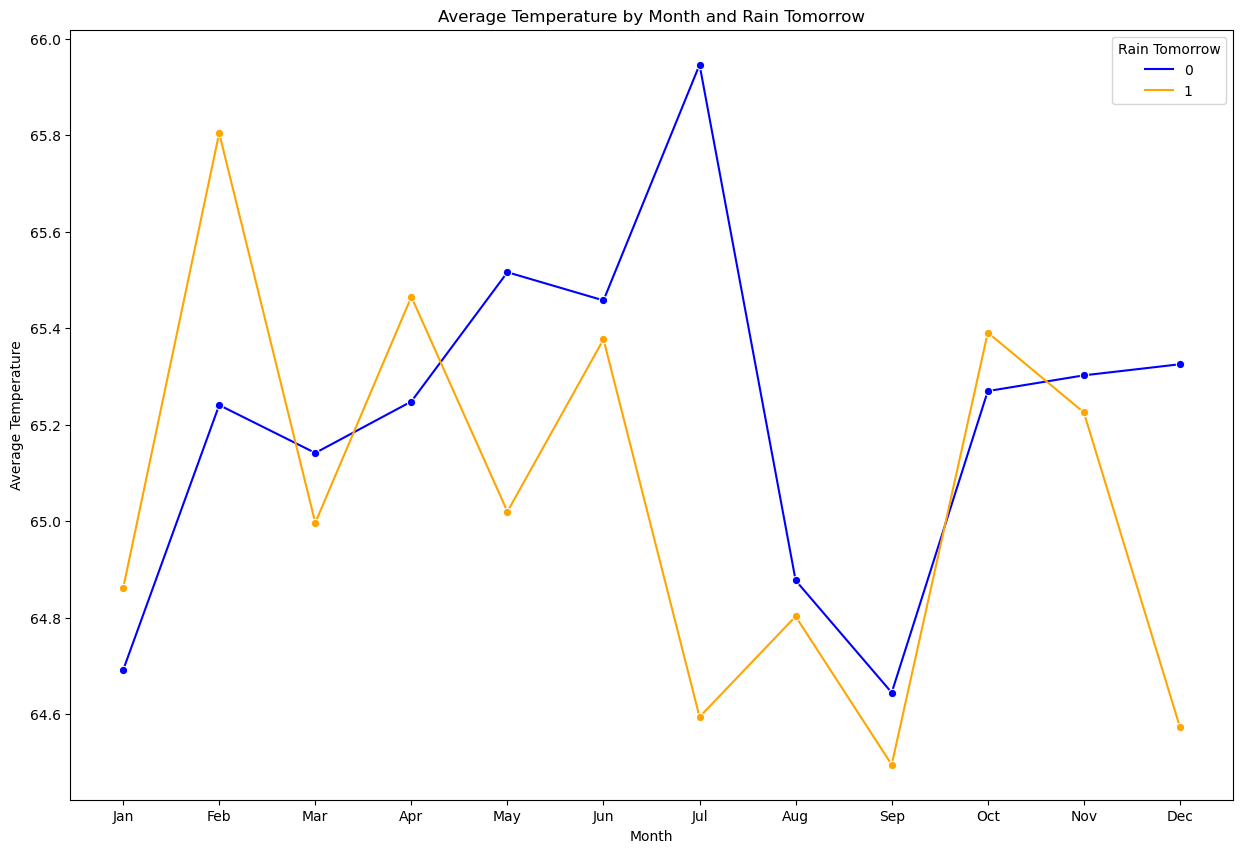

In [53]:
#one more chance lets try temp
monthly_Temperature = df.groupby([df['Date'].dt.month, 'Rain Tomorrow'])['Temperature'].mean().reset_index()

plt.figure(figsize=(15, 10))


sns.lineplot(data=monthly_Temperature, x='Date', y='Temperature', hue='Rain Tomorrow', palette=['blue', 'orange'], marker='o')

plt.title('Average Temperature by Month and Rain Tomorrow')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 
                                         'Nov', 'Dec'])
plt.legend(title='Rain Tomorrow')
plt.show()

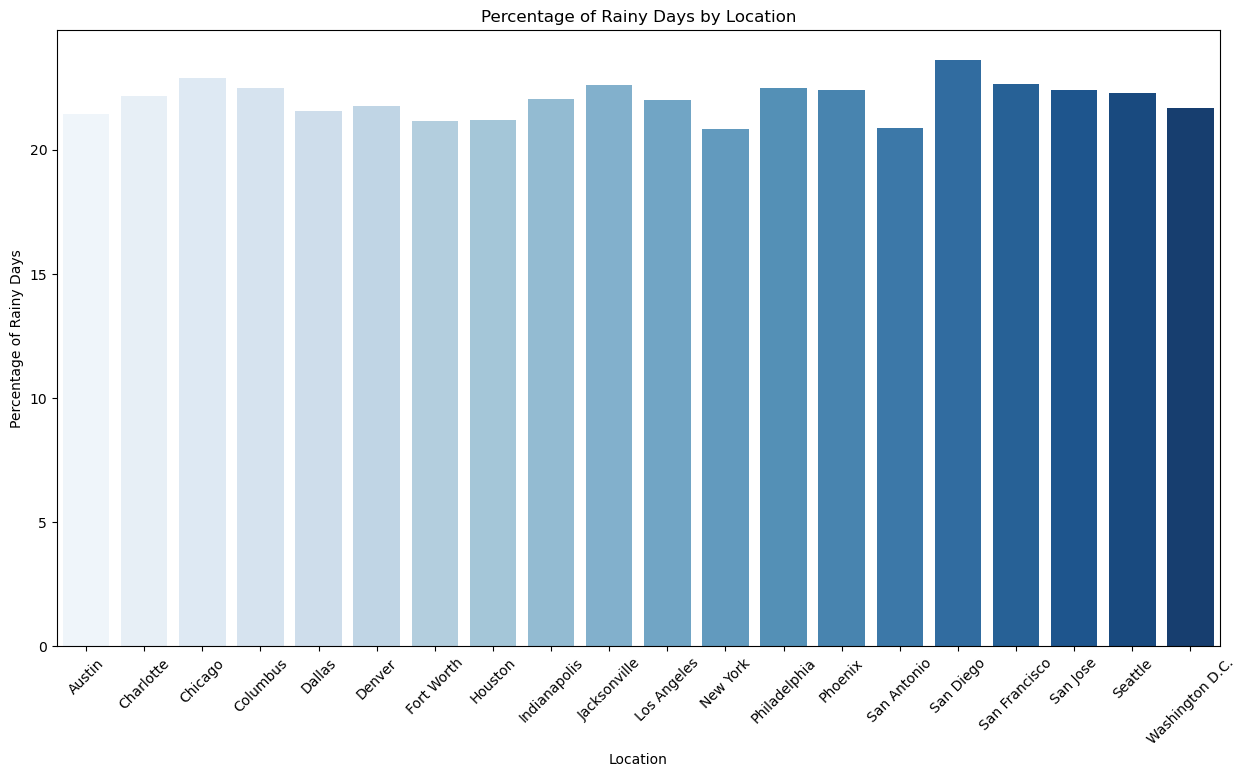

In [54]:
#ya im just not convinced that the year round temp falls between 65 to 66 on average in US....dont save them they dont 
#wanna be saved dont save them....

#lets look if there's any interesting insights between our cities and rain or no rain 

#lets see if some locations get more rain than others
location_rain_summary = df.groupby(['Location', 'Rain Tomorrow']).size().unstack(fill_value=0)


location_rain_summary['Total'] = location_rain_summary.sum(axis=1)
location_rain_summary['Rainy Days %'] = (location_rain_summary[1] / location_rain_summary['Total']) * 100
location_rain_summary['No Rain %'] = (location_rain_summary[0] / location_rain_summary['Total']) * 100


location_rain_summary = location_rain_summary.reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(data=location_rain_summary, x='Location', y='Rainy Days %', palette='Blues')
plt.title('Percentage of Rainy Days by Location')
plt.xlabel('Location')
plt.ylabel('Percentage of Rainy Days')
plt.xticks(rotation=45)
plt.show()

In [55]:
#i dont see that the location or date cols would add much insight to our model.
#im going to drop the location and date col and continue the project with the rest of our data.
#even tho this data set is a walking red flag...I CAN FIX HIM

df.drop(columns=['Location', 'Date'], inplace=True)
df.head()

Temperature   Humidity  Wind Speed  Precipitation  Cloud Cover  \
0    87.524795  75.655455   28.379506       0.000000    69.617966   
1    83.259325  28.712617   12.436433       0.526995    41.606048   
2    80.943050  64.740043   14.184831       0.916884    77.364763   
3    78.097552  59.738984   19.444029       0.094134    52.541196   
4    37.059963  34.766784    3.689661       1.361272    85.584000   

      Pressure  Rain Tomorrow  
0  1026.030278              0  
1   995.962065              0  
2   980.796739              1  
3   979.012163              0  
4  1031.790859              0

In [56]:
#lets download our df
df.to_csv('C:/Users/moe/Desktop/df_from_EDA.csv', index=False)